In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('Train_data.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
data = df

In [7]:
# Encode categorical variables
le_protocol_type = LabelEncoder()
data['protocol_type'] = le_protocol_type.fit_transform(data['protocol_type'])

le_service = LabelEncoder()
data['service'] = le_service.fit_transform(data['service'])

le_flag = LabelEncoder()
data['flag'] = le_flag.fit_transform(data['flag'])

# Encode the 'class' column
le_class = LabelEncoder()
data['class'] = le_class.fit_transform(data['class'])

In [8]:
X = data.drop(columns=['class'])
y = data['class']

In [9]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [10]:
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.11355066 -0.12606067 -0.64538418 ... -0.62736475 -0.22166806
  -0.37428075]
 [-0.11355066  2.21591606  0.76892549 ... -0.62736475 -0.38513984
  -0.37428075]
 [-0.11355066 -0.12606067  1.09035951 ...  1.61445359 -0.38513984
  -0.37428075]
 ...
 [-0.11355066 -0.12606067  1.09035951 ... -0.62736475  2.88429591
   2.77704096]
 [-0.11355066 -0.12606067  0.57606508 ...  1.61445359 -0.38513984
  -0.37428075]
 [-0.11355066 -0.12606067 -0.77395779 ...  1.61445359 -0.38513984
  -0.37428075]]


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import pandas as pd

# Assuming you have your data in X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

Epoch 1/10
504/504 [==============================] - 4s 4ms/step - loss: 0.1104 - accuracy: 0.9616 - val_loss: 0.0699 - val_accuracy: 0.9742
Epoch 2/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9820 - val_loss: 0.0552 - val_accuracy: 0.9836
Epoch 3/10
504/504 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0655 - val_accuracy: 0.9824
Epoch 4/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0597 - val_accuracy: 0.9836
Epoch 5/10
504/504 [==============================] - 2s 3ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0501 - val_accuracy: 0.9829
Epoch 6/10
504/504 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.0510 - val_accuracy: 0.9861
Epoch 7/10
504/504 [==============================] - 2s 3ms/step - loss: 0.0295 - accuracy: 0.9893 - val_loss: 0.0407 - val_accuracy: 0.9878
Epoch 

In [12]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

158/158 [==============================] - 0s 1ms/step
Confusion Matrix:
[[2343   22]
 [  25 2649]]


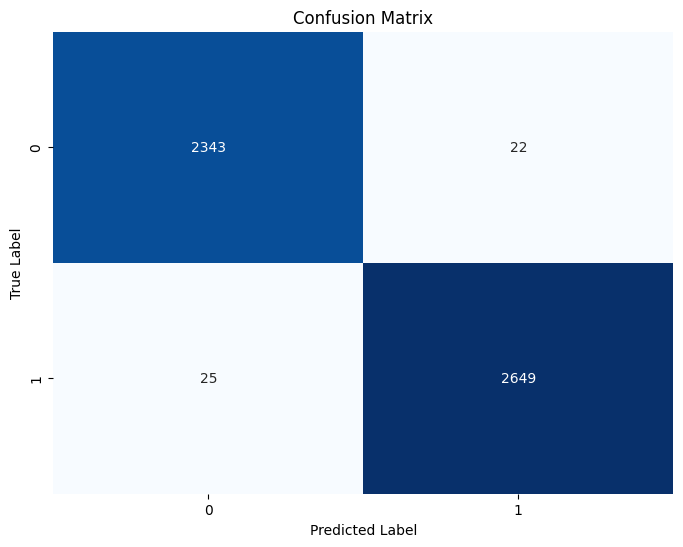

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()